In [2]:
%pip install --upgrade pip
%pip install numpy
%pip install scipy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import scipy as sp
import cmath

**Part 1: Bitwise operations** $$ \\ $$
Let us see how to represent a spin $\frac{1}{2}$ chain (or a chain of spinless fermions) using integers and their bit representation. First, let us see how to get the bitstring out of an integer:

In [4]:
print(bin(12))
#or 
print(format(6,'b'))

0b1100
110


Using bitwise operators, create a function that shifts every state to the right by $n$ units:

In [5]:
def shift_right(i:int,n:int,N:int):
    #i: the integer representing the state
    #n: the amount of sites by which the state should be shifted
    #N: the system size
    
    #Write a function that gives as an output the integer that one obtains by the shift. So if i=9, n=1 and N=4
    #you should get 12 as an output.
    
    shifted = (i >> n) | ((i & (1<< n) -1) << (N-n))
    return shifted

        

In [6]:
# Beispielaufruf
i = 9  # 1001 in binär
n = 2
N = 4
output = shift_right(i, n, N)
print(output)  # Ausgabe sollte 12 sein, was 1100 in binär ist

6


Let us time it for later comparison

In [7]:
%timeit shift_right(4,2,4)

214 ns ± 5.74 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Let us write the same function for an array, using np.roll:

In [8]:
def shift_right_array(a:np.array,n):
    return(np.roll(a,n))

Let us time it as well and compare:

In [9]:
ar = np.array([1,0,1,0])
%timeit shift_right_array(ar,2)

6.03 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Great, we can actually save quite some time by resorting to the representation of states as bits of an integer. Similarly to above, create a function that shifts every state to the left by $n$ units:

In [10]:
def shift_left(i:int,n:int,N:int):
    #i: the integer representing the state
    #n: the amount of sites by which the state should be shifted
    #N: the system size
    
    #Write a function that gives as an output the integer that one obtains by the shift.
    
    shifted = (i << n) | ((i & (1 << N) -1) >> (N-n))
    return shifted

Write a function to count the number of up spins:


In [11]:
def count_upspins(i:int):
    #i: the integer representing the state
    
    #Write a function that gives as an output the number of upspins in the state
    
    
    return bin(i).count('1')

Write a function to check the spin at site j:

In [12]:
def spin_at_j(i:int,j:int):
    #i: the integer representing the state
    #j: the site at which the spin should be flipped
    
    #Write a function that gives as an output the spin of the state i at site j
    
    
    return (i >> j) & 1

Write a function to flip the spin at site j:

In [13]:
def flip_spin(i:int,j:int):
    #i: the integer representing the state
    #j: the site at which the spin should be flipped
    
    #Write a function that gives as an output the integer obtained by flipping the spin of the state i at site j
    return i ^ (1 << j)

Write a function to flip all the spins at once:

In [14]:
def flip_all_spins(i:int,N:int):
    #i: the integer representing the state
    #N: the size of the system
    
    #Write a function that gives as output the integer obtained if all the spins are flipped
    mask = (1 << N) - 1
    
    return ~i & mask

In [15]:
# Beispielaufruf
i = 9  # 1001 in binär
N = 4
output = flip_all_spins(i, N)
print(output)  # Ausgabe sollte 6 sein, was 0110 in binär ist

6


Assuming we have a chain of 10 spin-$\frac{1}{2}$'s, compute the sizes of the different magnetization sectors of the Hilbert space.

Magnetization -10: [0]
Magnetization -9: []
Magnetization -8: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
Magnetization -7: []
Magnetization -6: [3, 5, 6, 9, 10, 12, 17, 18, 20, 24, 33, 34, 36, 40, 48, 65, 66, 68, 72, 80, 96, 129, 130, 132, 136, 144, 160, 192, 257, 258, 260, 264, 272, 288, 320, 384, 513, 514, 516, 520, 528, 544, 576, 640, 768]
Magnetization -5: []
Magnetization -4: [7, 11, 13, 14, 19, 21, 22, 25, 26, 28, 35, 37, 38, 41, 42, 44, 49, 50, 52, 56, 67, 69, 70, 73, 74, 76, 81, 82, 84, 88, 97, 98, 100, 104, 112, 131, 133, 134, 137, 138, 140, 145, 146, 148, 152, 161, 162, 164, 168, 176, 193, 194, 196, 200, 208, 224, 259, 261, 262, 265, 266, 268, 273, 274, 276, 280, 289, 290, 292, 296, 304, 321, 322, 324, 328, 336, 352, 385, 386, 388, 392, 400, 416, 448, 515, 517, 518, 521, 522, 524, 529, 530, 532, 536, 545, 546, 548, 552, 560, 577, 578, 580, 584, 592, 608, 641, 642, 644, 648, 656, 672, 704, 769, 770, 772, 776, 784, 800, 832, 896]
Magnetization -3: []
Magnetization -2: [15, 23, 27,

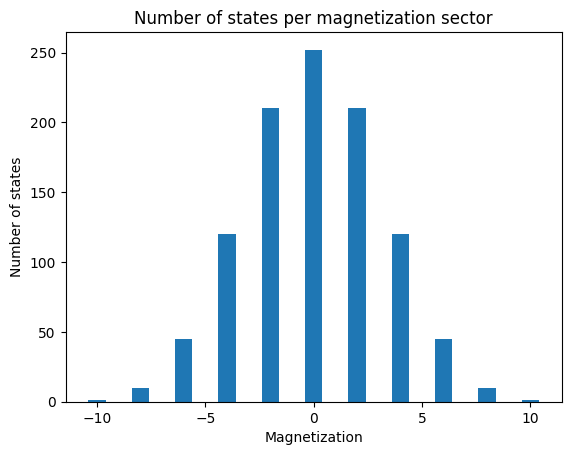

In [16]:
from matplotlib import pyplot as plt
#state the size of your system
N = 10

#state the possible values the magnetization may take
possible_magnetizations = np.linspace(-N,N,2*N+1)

#Create a dictionary to save the set of states for each magnetization sector
m_sectors = {}

#Initialize an empty list in the dictionary for every possible m-value
for m in possible_magnetizations:
    m_sectors[f'{int(m)}'] = []


#Iterate over all the basis states and order them according to their magnetization
for i in range(0,2**N):
    number_of_upspins = count_upspins(i)
    
    magnetization = 2 * number_of_upspins - N
    
    m_sectors[f'{magnetization}'].append(i)

#if you wish, print the subspaces of the different magnetizations

for m,basis in m_sectors.items():
    print(f"Magnetization {m}: {basis}")
    
    
# Plot the number of states per magnetization sector as a bar chart
magnetizations = [int(m) for m in possible_magnetizations]
num_states = [len(m_sectors[f'{int(m)}']) for m in possible_magnetizations]

plt.figure()
plt.bar(magnetizations, num_states)
plt.xlabel('Magnetization')
plt.ylabel('Number of states')
plt.title('Number of states per magnetization sector')
plt.show()
    
#es sind alles basisvekotrne da kein zustand von andern beschriebn werden kann. also 111 kann also zah lvin 100 ,010,001 beschriebn werden, aber die Null hat ja auch eine gewichtung und ywar spin down 

**Part 2: Transverse Field Ising Model**

By now you should have solved the exercise to express the Transeverse Field Ising Hamiltonian in the momentum state basis. Let us combine our knowledge to numerical use and apply it on the TFI,
$$\hat H = \sum\limits_{i=0}^{N - 1} \sigma_i^z \sigma_{i + 1}^z + h^x \sum\limits_i \sigma^x.$$
The ultimate goal will be to exactly diagonalize the model and make use of the translation symmetry. Here we'll do some preparatory work. Assume $N=8$. What are the possible momenta $P_n$ that one could have?
$$ P_n=\frac{2\pi}{N}n, \; n=0,1,...,7.$$ 
- Find the representatives of all the orbits generated by the translation operator $\hat{T}$. Choose as representative of an orbit the state of the orbit corresponding to the lowest integer value (state with up- and down spins <--> integer value via the bit representation).  
- Next, check wich orbits are compatible with the momentum $P_n$ (remember that e.g. the orbit created by the state $|\uparrow\downarrow\uparrow\downarrow\uparrow\downarrow\uparrow\downarrow\rangle$ is only compatible with the momenta $P_0=\frac{2\pi}{8}0=0$ and $P_2=\frac{2\pi}{8}4=\pi$, because translating the state twice must bring it back to itself, meaning that $\exp(-iP_n2)$ must be equal to $1$.)


In [17]:
#Write a function that gives you the representatives for every orbit:
def orbit_representatives(N:int):
    #N:the size of the system
    
    #Write a function that gives you an array of the representatives for every orbit. Choose as representative the
    #state corresponding to the lowest integer value
    representatives = []
    for i in range(0,2**N):
        min_state = i
        for shift in range(N):
            shifted_state = shift_right(i,shift,N)
            if shifted_state < min_state:
                min_state = shifted_state
        if min_state not in representatives:
            representatives.append(min_state)
    return np.array(representatives)


#Using the array with representatives, i.e. the output of orbit_representatives, check which orbits
#are compatible with the momentum P_n and return the representatives:

def compatible_representatives(reps: np.array, n: int, N: int):
    # reps: The representatives as obtained in the output of the function above.
    # n: The integer corresponding to the momentum Pn = (2 * np.pi / N) * n
    # N: The system size
    
    # Calculate the momentum Pn
    Pn = (2 * np.pi / N) * n
    
    # Initialize an empty list to store compatible representatives
    compat_reps = []
    
    # Iterate through each representative in the reps array
    for rep in reps:
        # Compute the phase factor for the current representative
        phase_factor = cmath.exp(-1j * Pn * rep)
        
        # Check if the magnitude of the phase factor is close to 1
        if np.isclose(abs(phase_factor), 1):
            compat_reps.append(rep)
    
    # Return the compatible representatives as a numpy array
    return np.array(compat_reps)

                
                


If everything is implemented correctly, if you run orbit_representatives(6) you should obtain [0  1  3  5  7  9 11 13 15 21 23 27 31 63], and if you run compatible_representatives(orbit_representatives(6),2,6) you should obtain [ 1  3  5  7  9 11 13 15 23 27 31]

The number of representatives that are compatible with a certain momentum is also the dimension of the correponding invariant subspace (make sure that you understand that it is not a basis for the invariant subspace, though...). Check that everything adds up (in the case N=8), i.e. that the compatible states for all the momenta sum up to 256.

In [19]:
#Define the system size:
N = 8

#initialize a counter
counter = 0

for n in range(0,N):
    counter+=len(compatible_representatives(orbit_representatives(N),n,N))
    
print(counter)



288
